In [ ]:
file_path = r'C:\Users\ChxxxXL\Documents\MedicalImage\result'
dst_path = r'C:\Users\ChxxxXL\Pictures\毕设'
file_lists = [['final_imgcgan_grad_img.npy', 'gt_imgcgan_grad_img.npy'], 
                ['final_imgcgan_grad_loss.npy', 'gt_imgcgan_grad_loss.npy'],
                ['final_imgcgan.npy', 'gt_imgcgan.npy'],
                ['final_imgunet_same_img.npy', 'gt_imgunet_same_img.npy']]

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from evaltools import eval_img
import cv2 as cv
# plt.rcParams['font.sans-serif']=['Simhei']
import SimpleITK as sitk
from matplotlib import rcParams
config = {
    "font.family":'serif',
    "font.size": 12,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
from matplotlib.font_manager import FontProperties
# plt.rcParams['font.sans-serif']=['SimSun'] #用来显示正常中文的标签
import pandas as pd
from scipy import stats

In [ ]:
mr_file = os.path.join(file_path, '062MR.nii')
mr_img = sitk.ReadImage(mr_file)
mr_img = sitk.GetArrayFromImage(mr_img)

In [ ]:
src_img_unet = np.load(os.path.join(file_path, file_lists[3][0]))
src_img_cgan = np.load(os.path.join(file_path, file_lists[2][0]))
src_img_cgan_grad = np.load(os.path.join(file_path, file_lists[1][0]))
src_img_cgan_img = np.load(os.path.join(file_path, file_lists[0][0]))
src_img_gt = np.load(os.path.join(file_path, file_lists[0][1]))

In [ ]:
img_select_num = 2
img_unet = src_img_unet[img_select_num, 0]
img_cgan = src_img_cgan[img_select_num, 0]
img_cgan_grad = src_img_cgan_grad[img_select_num, 0]
img_cgan_img = src_img_cgan_img[img_select_num ,0]
img_gt = src_img_gt[img_select_num, 0]

In [ ]:
psnr_unet, ssim_unet = eval_img(img_unet, img_gt)
psnr_cgan, ssim_cgan = eval_img(img_cgan, img_gt)
psnr_cgan_grad, ssim_cgan_grad = eval_img(img_cgan_grad, img_gt)
psnr_cgan_img, ssim_cgan_img = eval_img(img_cgan_img, img_gt)

In [ ]:
print('unet: ', psnr_unet, ssim_unet)
print('cgan: ', psnr_cgan, ssim_cgan)
print('cgan_grad: ', psnr_cgan_grad, ssim_cgan_grad)
print('cgan_img: ', psnr_cgan_img, ssim_cgan_img)

In [ ]:
def get_show_img(img, dim, slice_num):
    img_shape = (181, 216, 181)
    show_img = None
    if dim == 0:
        show_img = img[slice_num, :img_shape[1], :img_shape[2]]
    elif dim == 1:
        show_img = img[:img_shape[0], slice_num, :img_shape[2]]
    else:
        show_img = img[:img_shape[0], :img_shape[1], slice_num]
    w, h = show_img.shape
    center = (w//2, h//2)
    M = cv.getRotationMatrix2D(center, -180, 1.0) #15
    show_img = cv.warpAffine(show_img, M, (w, h)) #16
    return show_img
    

In [ ]:
matplotlib.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = 'SimHei'
slice_num = 90
dim = 1
fig = plt.figure(figsize=(20, 6))

# fig = plt.figure(dpi=300)
ax = fig.add_subplot(2, 6, 1)
plt.title('MRI')
show_img = get_show_img(mr_img, dim, slice_num)
plt.imshow(show_img, 'gray')
plt.axis("off")
ax = fig.add_subplot(2, 6, 2)
plt.title('U-Net网络')
show_img = get_show_img(img_unet, dim, slice_num)
plt.imshow(show_img, 'gray')
plt.axis("off")
ax = fig.add_subplot(2, 6, 3)
plt.title('cGAN网络')
show_img = get_show_img(img_cgan, dim, slice_num)
plt.imshow(show_img, 'gray')
plt.axis("off")
ax = fig.add_subplot(2, 6, 4)
plt.title('cGAN+梯度损失')
show_img = get_show_img(img_cgan_grad, dim, slice_num)
plt.imshow(show_img, 'gray')
plt.axis("off")
ax = fig.add_subplot(2, 6, 5)
plt.title('cGAN+图像边缘损失')
show_img = get_show_img(img_cgan_img, dim, slice_num)
plt.imshow(show_img, 'gray')
plt.axis("off")
ax = fig.add_subplot(2, 6, 6)
plt.title('真值图像')
show_img = get_show_img(img_gt, dim, slice_num)
plt.imshow(show_img, 'gray')
plt.axis("off")

cnorm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
ax = fig.add_subplot(2, 6, 8)
show_img = get_show_img(img_gt, dim, slice_num) - get_show_img(img_unet, dim, slice_num)
plt.imshow(show_img, norm=cnorm, cmap='bwr')
plt.axis("off")
ax = fig.add_subplot(2, 6, 9)
show_img = get_show_img(img_gt, dim, slice_num) - get_show_img(img_cgan, dim, slice_num)
plt.imshow(show_img, norm=cnorm, cmap='bwr')
plt.axis("off")
ax = fig.add_subplot(2, 6, 10)
show_img = get_show_img(img_gt, dim, slice_num) - get_show_img(img_cgan_grad, dim, slice_num)
plt.imshow(show_img, norm=cnorm, cmap='bwr')
plt.axis("off")
ax = fig.add_subplot(2, 6, 11)
show_img = get_show_img(img_gt, dim, slice_num) - get_show_img(img_cgan_img, dim, slice_num)
plt.imshow(show_img, norm=cnorm, cmap='bwr')
plt.axis("off")

ax = fig.add_subplot(2, 6, 12)
m = matplotlib.cm.ScalarMappable(norm=cnorm, cmap=matplotlib.cm.bwr)
m.set_array(d)
plt.colorbar(m)

In [ ]:
d = get_show_img(img_gt, dim, slice_num) - get_show_img(img_cgan_img, dim, slice_num)
fig = plt.figure(dpi=100)
plt.figure(num=1)
cnorm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
print(d.min(), d.max())
# m = matplotlib.cm.ScalarMappable(norm=cnorm, cmap=matplotlib.cm.bwr)
# m.set_array(d)
plt.imshow(d, norm=cnorm, cmap="bwr")
# plt.axis("off")
# plt.colorbar(m)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())
# plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0, wspace=0)
# plt.margins(0, 0)
# plt.savefig('E:/out/test.png' , bbox_inches='tight', dpi=400,pad_inches=0)

In [ ]:
row = 150
curves = [get_show_img(img_gt, dim, slice_num)[row, :], get_show_img(img_cgan, dim, slice_num)[row, :], get_show_img(img_cgan_grad, dim, slice_num)[row, :], get_show_img(img_cgan_img, dim, slice_num)[row, :]]

In [ ]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(curves[0])
plt.plot(curves[1])
plt.plot(curves[2])
plt.legend(['真值图像','cGAN', 'cGAN+梯度损失'])
ax = fig.add_subplot(1, 2, 2)
plt.plot(curves[0])
plt.plot(curves[1])
plt.plot(curves[3])
plt.legend(['真值图像','cGAN', 'cGAN+图像边缘损失'])

In [ ]:
psnrs = [psnr_unet, psnr_cgan, psnr_cgan_grad, psnr_cgan_img]
ssims = [ssim_unet, ssim_cgan, ssim_cgan_grad, ssim_cgan_img]

In [ ]:
import matplotlib.pyplot as plt
# fontDict =  "C:\\Windows\\Fonts\\simsun.ttc"  
# my_font = FontProperties(fname = fontDict, size = 20)

labels = ['U-Net','cGAN','梯度损失','图像边缘损失']
plt.rcParams['axes.labelsize'] = 12 # xy轴label的size
plt.rcParams['xtick.labelsize'] = 12 # x轴ticks的size
plt.rcParams['ytick.labelsize'] = 14 # y轴ticks的size
# 设置柱形的间隔
total_width, n = 0.8, 2
width = total_width / n
width = 0.3

x1_list, x2_list = [], []
for i in range(len(psnrs)):
    x1_list.append(i)
    x2_list.append(i+width+0.1)

# 创建图层
fig, ax1 = plt.subplots()
ax1.set_ylabel('PSNR')
ax1.set_ylim(17, 22)
b1 = ax1.bar(x1_list,psnrs, width=width, label="PSNR",color='skyblue', align='edge')
# plt.bar(x2_list,b, width=width, label="b",color='cornflowerblue', align='edge', tick_label=labels)
# plt.bar(x3_list,c, width=width, label="c",color='aqua', align='edge', tick_label=labels)
# plt.bar(x4_list,d, width=width, label="d",color='coral', align='edge', tick_label=labels)

ax6 = ax1.twinx()
ax6.set_ylim(0.8, 1)

ax6.set_ylabel('SSIM')

b2 = plt.bar(x2_list,ssims, width=width, label="SSIM",color='plum', align='edge', tick_label=labels)
# b2 = plt.bar(x2_list,b_2, width=width, label="b",color='cornflowerblue', align='edge', tick_label=labels)

# b3 = plt.bar(x3_list,c_2, width=width, label="c",color='aqua', align='edge', tick_label=labels)

# b4 = plt.bar(x4_list,d_2, width=width, label="d",color='coral', align='edge', tick_label=labels)

plt.legend(handles=[b1,b2],loc="upper center",ncol=2)

plt.show()

In [ ]:
grad_loss_file = r'C:\Users\ChxxxXL\Downloads\run-cgan_grad_loss_train-tag-g_loss.csv'
grad_img_file = r'C:\Users\ChxxxXL\Downloads\run-cgan_grad_img_train-tag-g_loss.csv'
grad_loss_df = pd.read_csv(grad_loss_file)
grad_img_df = pd.read_csv(grad_img_file)

In [ ]:
idx = (np.arange(0, 150) * 270 / 150).astype('int')
grad_loss_df = grad_loss_df.iloc[idx]

In [ ]:
plt.plot(np.arange(0, 150), grad_loss_df['Value'])
plt.plot(np.arange(0, 150), grad_img_df['Value'])
# plt.xlabel('Step')
# plt.ylabel('Loss')
plt.legend(['梯度损失', '图像边缘损失'])

In [383]:
srgan_loss_file = r'C:\Users\ChxxxXL\Downloads\run-srcgan_train-tag-g_loss.csv'
srganres_loss_file = r'C:\Users\ChxxxXL\Downloads\run-res_srcgan_train-tag-g_loss.csv'
srgan_loss_df = pd.read_csv(srgan_loss_file)
srganres_loss_df = pd.read_csv(srganres_loss_file)

In [384]:
srgan_loss_df = srgan_loss_df.iloc[390:, :]
srganres_loss_df = srganres_loss_df.iloc[332:, :]

In [386]:
srganres_loss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 332 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Wall time  668 non-null    float64
 1   Step       668 non-null    int64  
 2   Value      668 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.8 KB


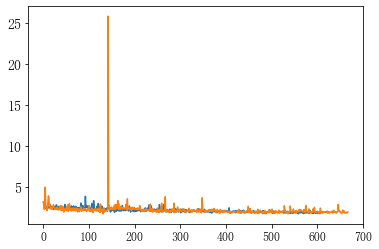

In [387]:
plt.plot(np.arange(0, 610), srgan_loss_df['Value'])
plt.plot(np.arange(0, 668), srganres_loss_df['Value'])

In [ ]:
metric_lists = [['unet_same_img_psnrs.txt', 'unet_same_img_ssims.txt'],
                ['cgan_psnrs.txt', 'cgan_ssims.txt'], 
                ['cgan_grad_loss_psnrs.txt', 'cgan_grad_loss_ssims.txt'],
                ['cgan_grad_img_psnrs.txt', 'cgan_grad_img_ssims.txt']
                ]
labels = ['U-Net', 'cGAN', '梯度损失', '图像边缘损失']

In [ ]:
psnrs, ssims = [], []
for psnr_file, ssim_file in metric_lists:
    psnrs.append(np.loadtxt(os.path.join(file_path, psnr_file)))
    ssims.append(np.loadtxt(os.path.join(file_path, ssim_file)))
psnrs = np.asarray(psnrs)
ssims = np.asarray(ssims)

In [ ]:
psnrs_data = pd.DataFrame(psnrs.T, columns=labels)
ssims_data = pd.DataFrame(ssims.T, columns=labels)

In [ ]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
psnrs_data.boxplot(patch_artist = True)
plt.title('PSNR')
ax = fig.add_subplot(1, 2, 2)
ssims_data.boxplot(patch_artist = True)
plt.title('SSIM')

In [ ]:
rvs1 = psnrs[0]
rvs2 = psnrs[1]
rvs3 = psnrs[2]
rvs4 = psnrs[3]

In [ ]:
print('{:.2f}, {:.2f}'.format(np.mean(rvs1), np.std(rvs1)))
print('{:.2f}, {:.2f}'.format(np.mean(rvs2), np.std(rvs2)))
print('{:.2f}, {:.2f}'.format(np.mean(rvs3), np.std(rvs3)))
print('{:.2f}, {:.2f}'.format(np.mean(rvs4), np.std(rvs4)))

In [ ]:
for i in range(4):
    for j in range(4):
        if i < j:
            t, p = stats.ttest_ind(psnrs[i],psnrs[j],equal_var = False)
            print(i, j, '{:.3f}, {:.3f}'.format(t, p))

In [ ]:
rvs1 = ssims[0]
rvs2 = ssims[1]
rvs3 = ssims[2]
rvs4 = ssims[3]

In [ ]:
print('{:.3f}, {:.3f}'.format(np.mean(rvs1), np.std(rvs1)))
print('{:.3f}, {:.3f}'.format(np.mean(rvs2), np.std(rvs2)))
print('{:.3f}, {:.3f}'.format(np.mean(rvs3), np.std(rvs3)))
print('{:.3f}, {:.3f}'.format(np.mean(rvs4), np.std(rvs4)))

In [ ]:
for i in range(4):
    for j in range(4):
        if i < j:
            t, p = stats.ttest_ind(ssims[i],ssims[j],equal_var = False)
            print(i, j, '{:.3f}, {:.3f}'.format(t, p))

In [ ]:
t, p = stats.ttest_ind(rvs1, rvs4, equal_var = False)

In [ ]:
t, p

In [ ]:
stats.levene(rvs1, rvs4)